In [149]:
%%html
<style>.container { width: 90% !important; }</style>

In [150]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import umap
import seaborn as sns
plt.close('all')

In [190]:
def load_dataframe(name_cfg):
    return pd.read_hdf(f"/Users/pierre-luc/repos/eai-graph-tools/eai_graph_tools/experiements/output_data/{name_cfg}/analysis_{name_cfg}.h5")

In [191]:
def get_embeddings(name, dim, node='all', label='all'):
    df = load_dataframe(f"EmbeddingGeometryAnalysis-I5-{name}-D{dim}")   
    if node != "all":
        df = df.loc[df['node'] == node]
    
    # Puts malicious events on top 
    df = df.sort_values(by='class_label')
    
    df.loc[df['class_label'] == "BENIGN", 'color'] = sns.xkcd_rgb["pale green"]
    df.loc[df['class_label'] == "FTP-Patator", 'color'] = sns.xkcd_rgb["pale blue"]
    df.loc[df['class_label'] == "SSH-Patator", 'color'] = sns.xkcd_rgb["blue"]
    df.loc[df['class_label'] == "DoS slowloris", 'color'] = sns.xkcd_rgb["pale orange"]
    df.loc[df['class_label'] == "DoS Slowhttptest", 'color'] = sns.xkcd_rgb["orange"]
    df.loc[df['class_label'] == "DoS Hulk", 'color'] = sns.xkcd_rgb["pale yellow"]
    df.loc[df['class_label'] == "DoS GoldenEye", 'color'] = sns.xkcd_rgb["pale brown"]
    df.loc[df['class_label'] == "Web Attack – Brute Force", 'color'] = sns.xkcd_rgb["pale purple"]
    df.loc[df['class_label'] == "Web Attack – XSS", 'color'] = sns.xkcd_rgb["dark purple"]
    df.loc[df['class_label'] == "Bot", 'color'] = sns.xkcd_rgb["dark red"]
    df.loc[df['class_label'] == "PortScan", 'color'] = sns.xkcd_rgb["pale red"]
    df.loc[df['class_label'] == "DDoS", 'color'] = sns.xkcd_rgb["dark yellow"]
    
    emb = np.array([list(eval(s)) for s in df.embeddings])
    emb_target = df.color.to_numpy()
    return emb, emb_target, df['class_label']     

In [192]:
def plot_umap(name, dim, node="all"):
    emb, target, _ = get_embeddings(name, dim, node)
    umap_emb = umap.UMAP(n_neighbors=25,
                         min_dist=0.9,
                         n_components=2,
                         metric="euclidean").fit_transform(emb)
    
    plt.scatter(umap_emb[:, 0], umap_emb[:, 1], c=target)
    plt.gca().set_aspect('equal', 'datalim')
    plt.legend()
    plt.title(f"UMAP {node} {name} {dim}", fontsize=12);

/Users/pierre-luc/repos/eai-graph-tools/venv_pycharm/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../venv_pycharm/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


<IPython.core.display.Javascript object>


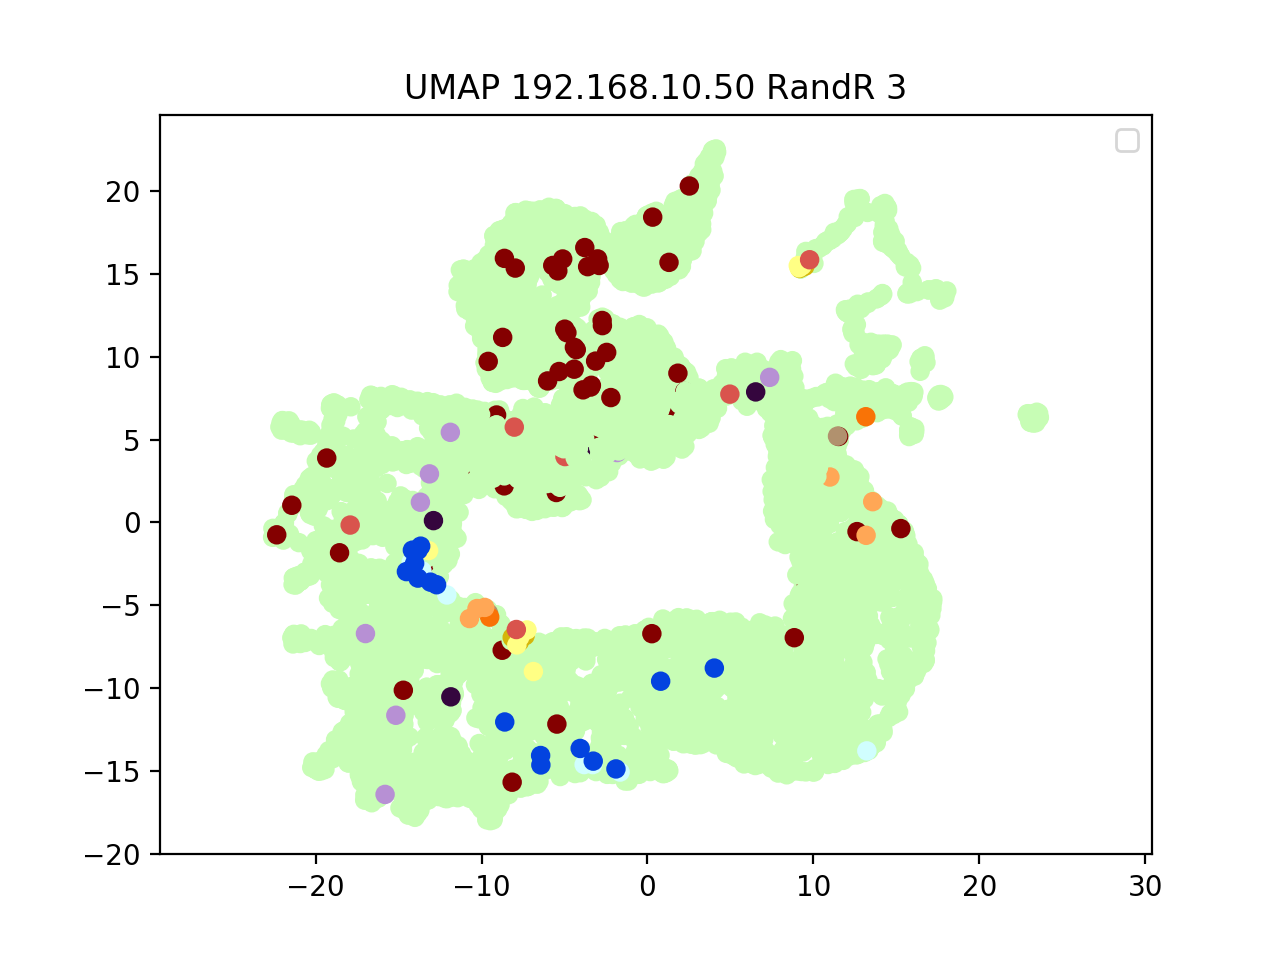

No handles with labels found to put in legend.


In [196]:
plot_umap("RandR", 3)


<IPython.core.display.Javascript object>


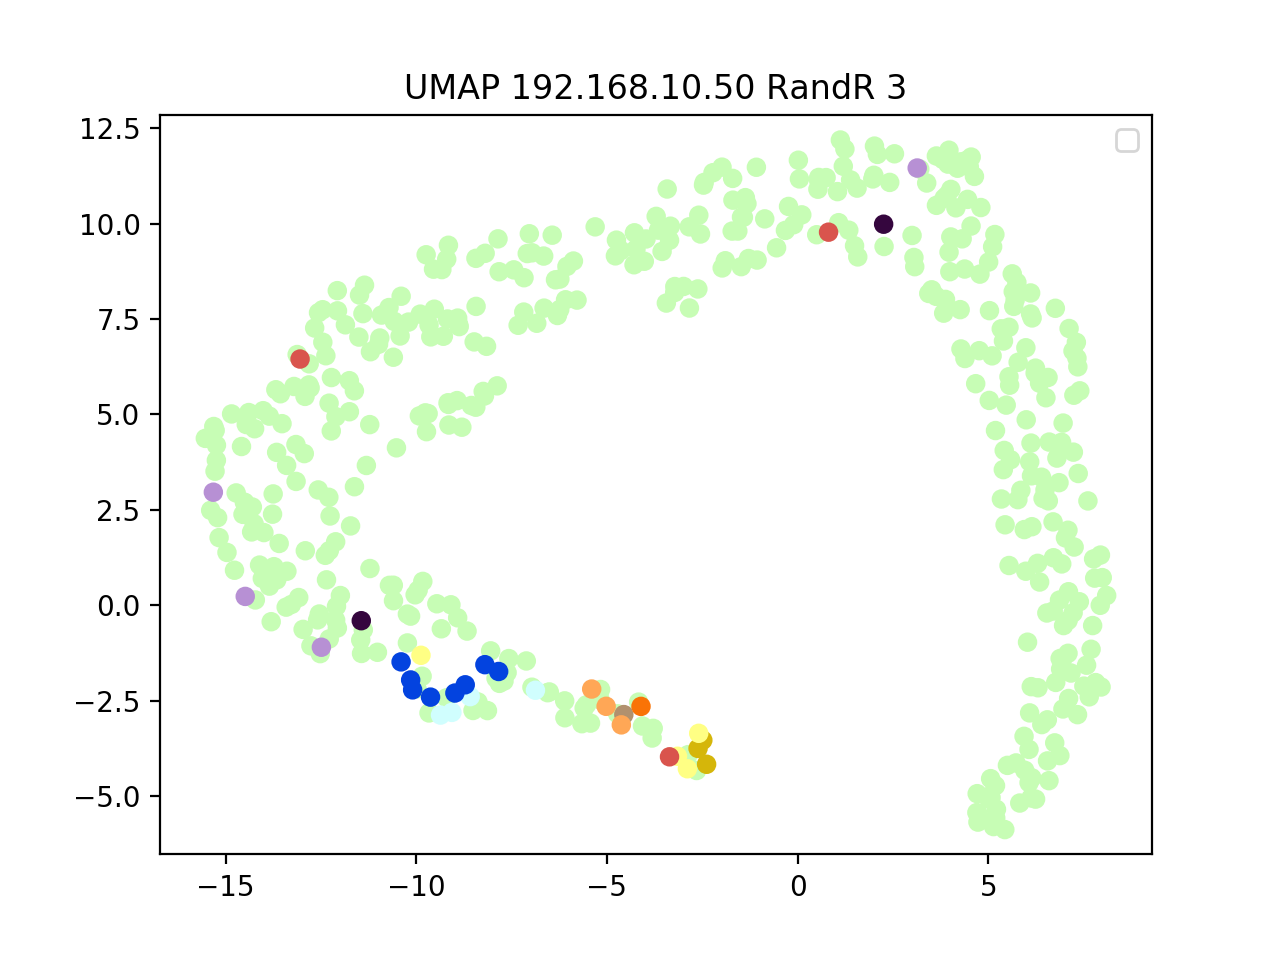

No handles with labels found to put in legend.


In [198]:
plot_umap("RandR", 3, "192.168.10.50")

<IPython.core.display.Javascript object>


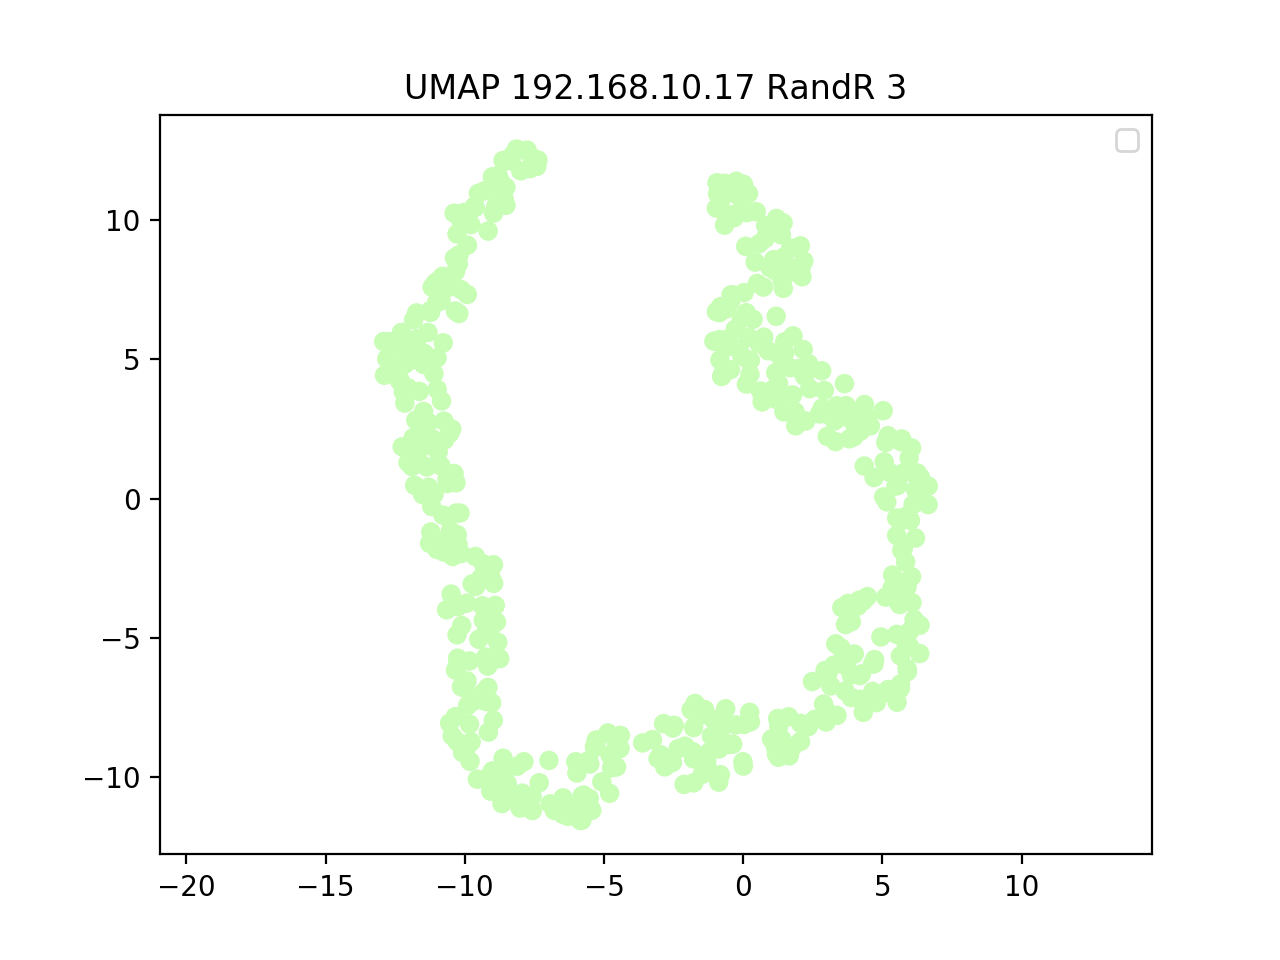

No handles with labels found to put in legend.


In [201]:
plot_umap("RandR", 3, "192.168.10.17")


/Users/pierre-luc/repos/eai-graph-tools/venv_pycharm/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


<IPython.core.display.Javascript object>


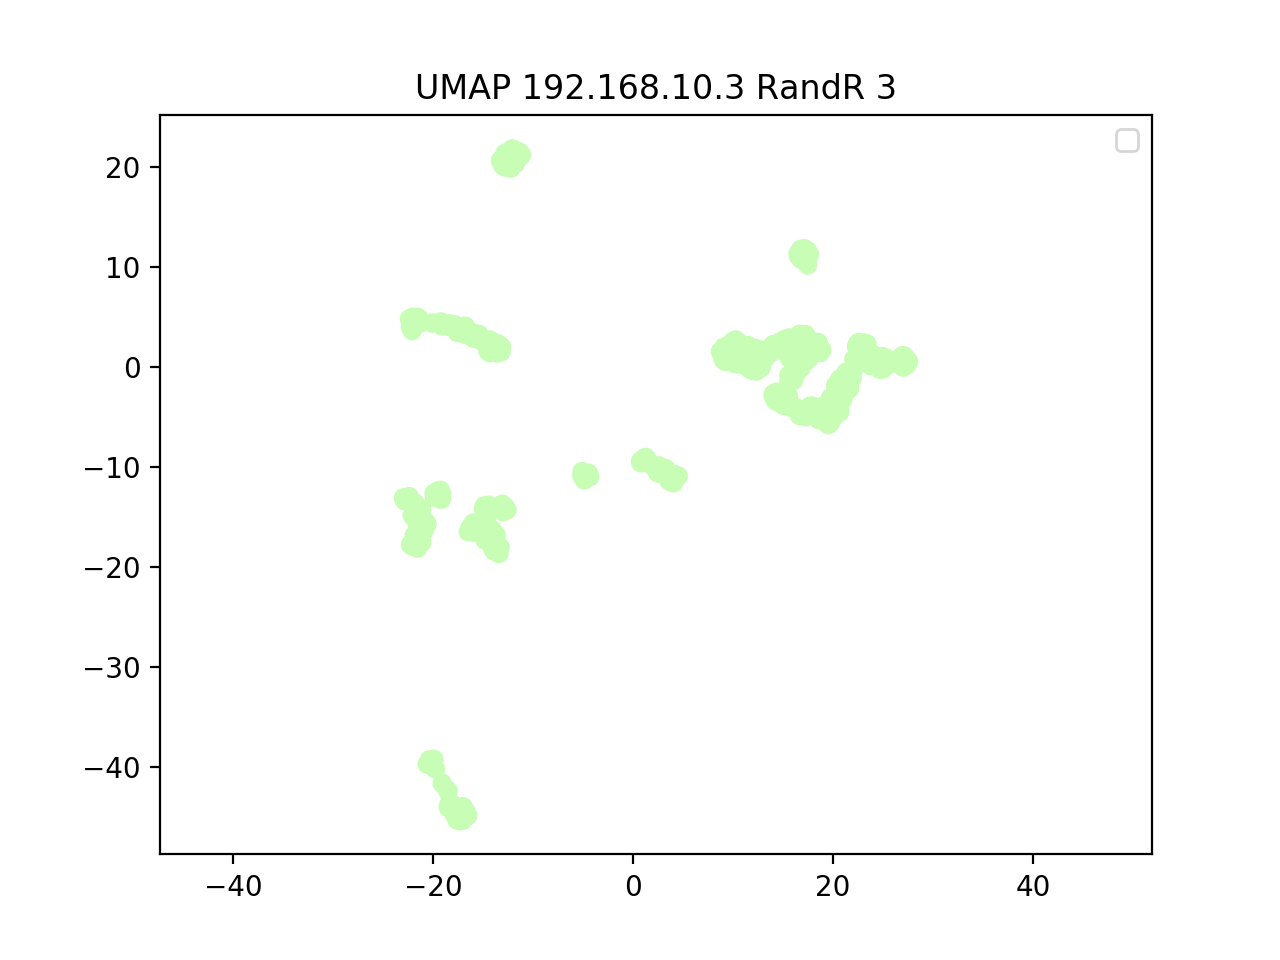

No handles with labels found to put in legend.


In [202]:
plot_umap("RandR", 3, "192.168.10.3")

<IPython.core.display.Javascript object>


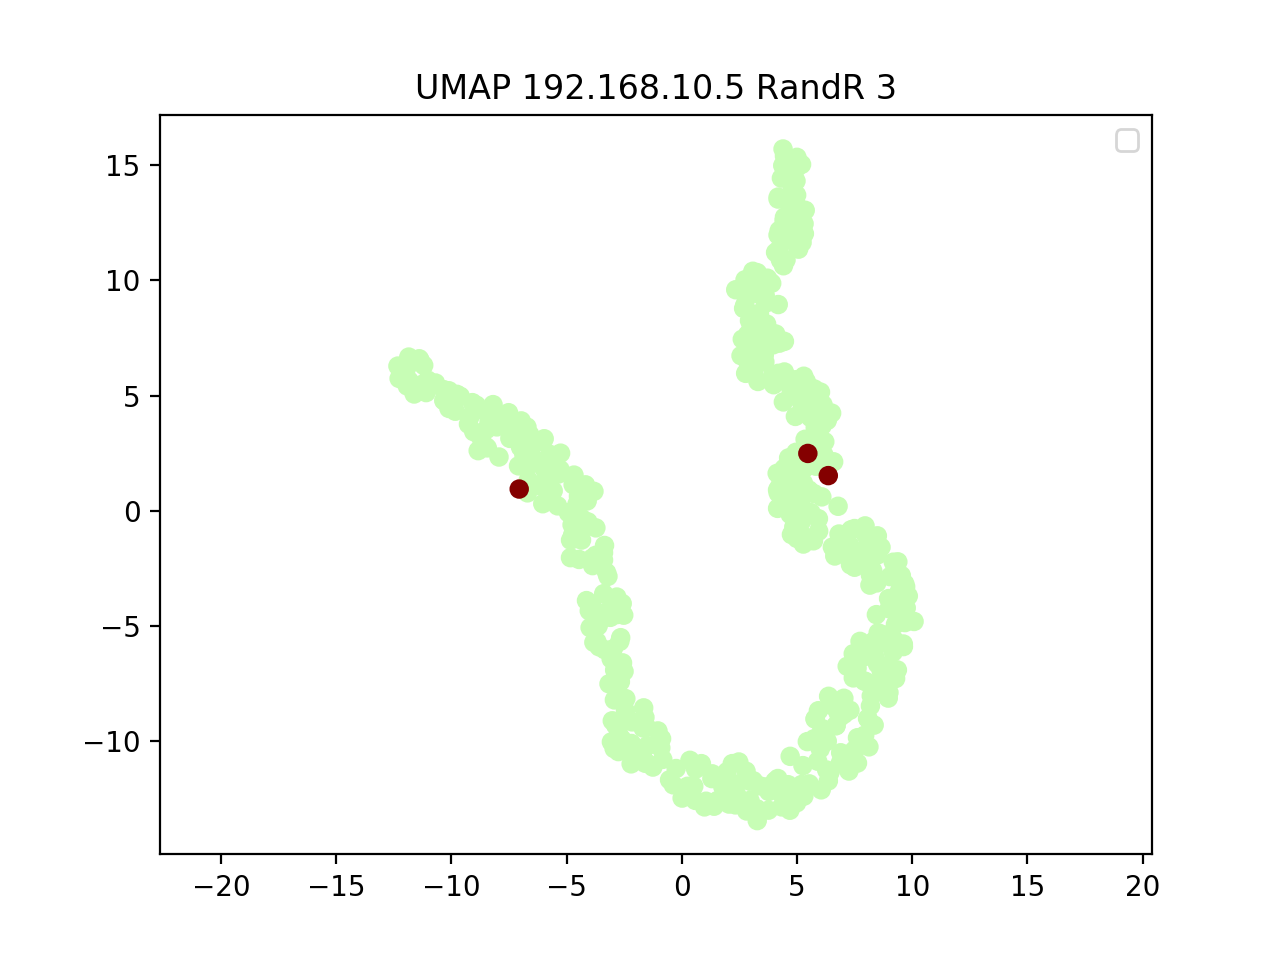

No handles with labels found to put in legend.


In [203]:
plot_umap("RandR", 3, "192.168.10.5")

/Users/pierre-luc/repos/eai-graph-tools/venv_pycharm/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../venv_pycharm/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


<IPython.core.display.Javascript object>


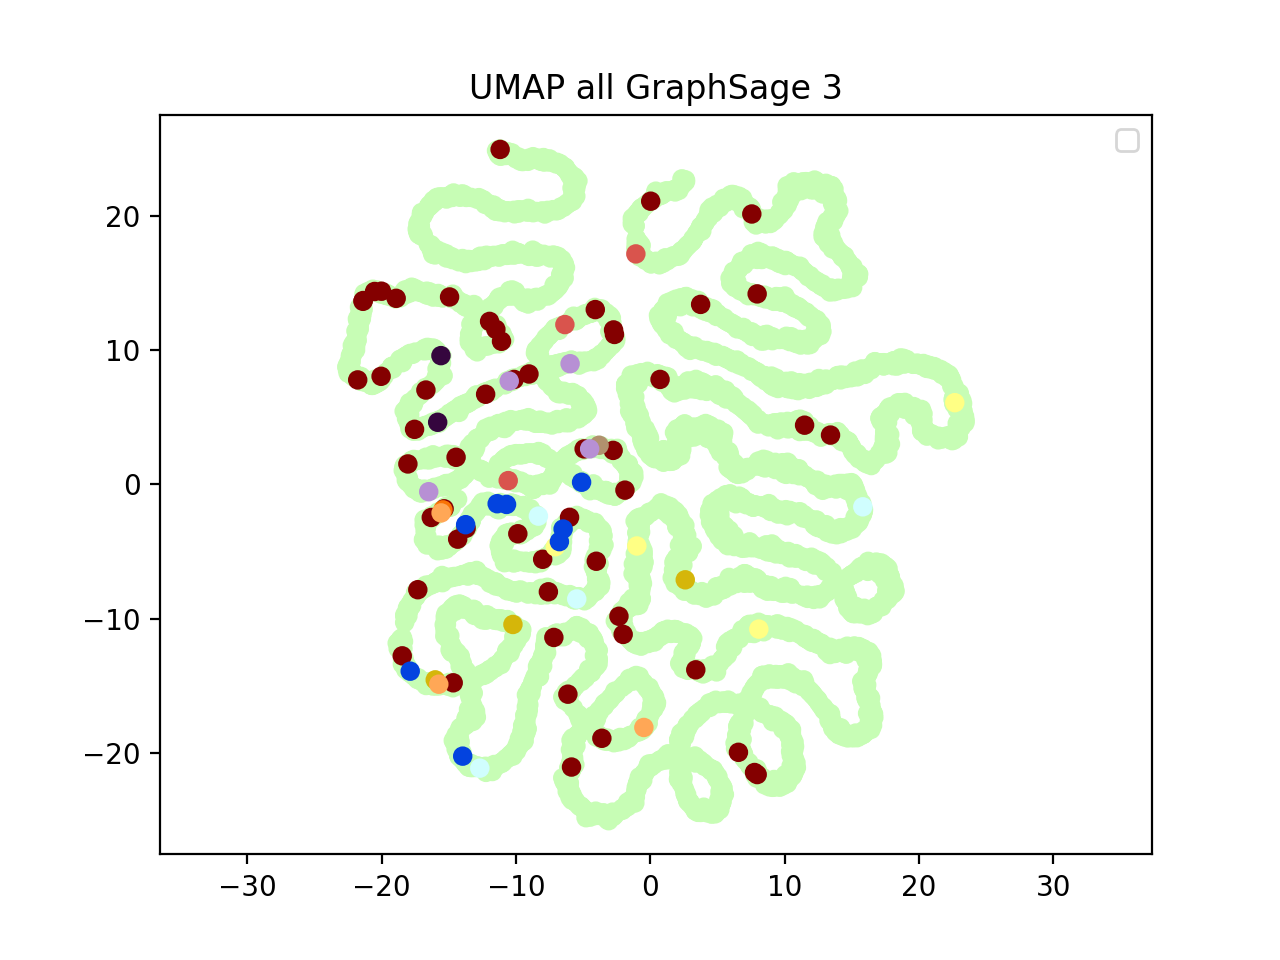

No handles with labels found to put in legend.


In [204]:
plot_umap("GraphSage", 3)


<IPython.core.display.Javascript object>


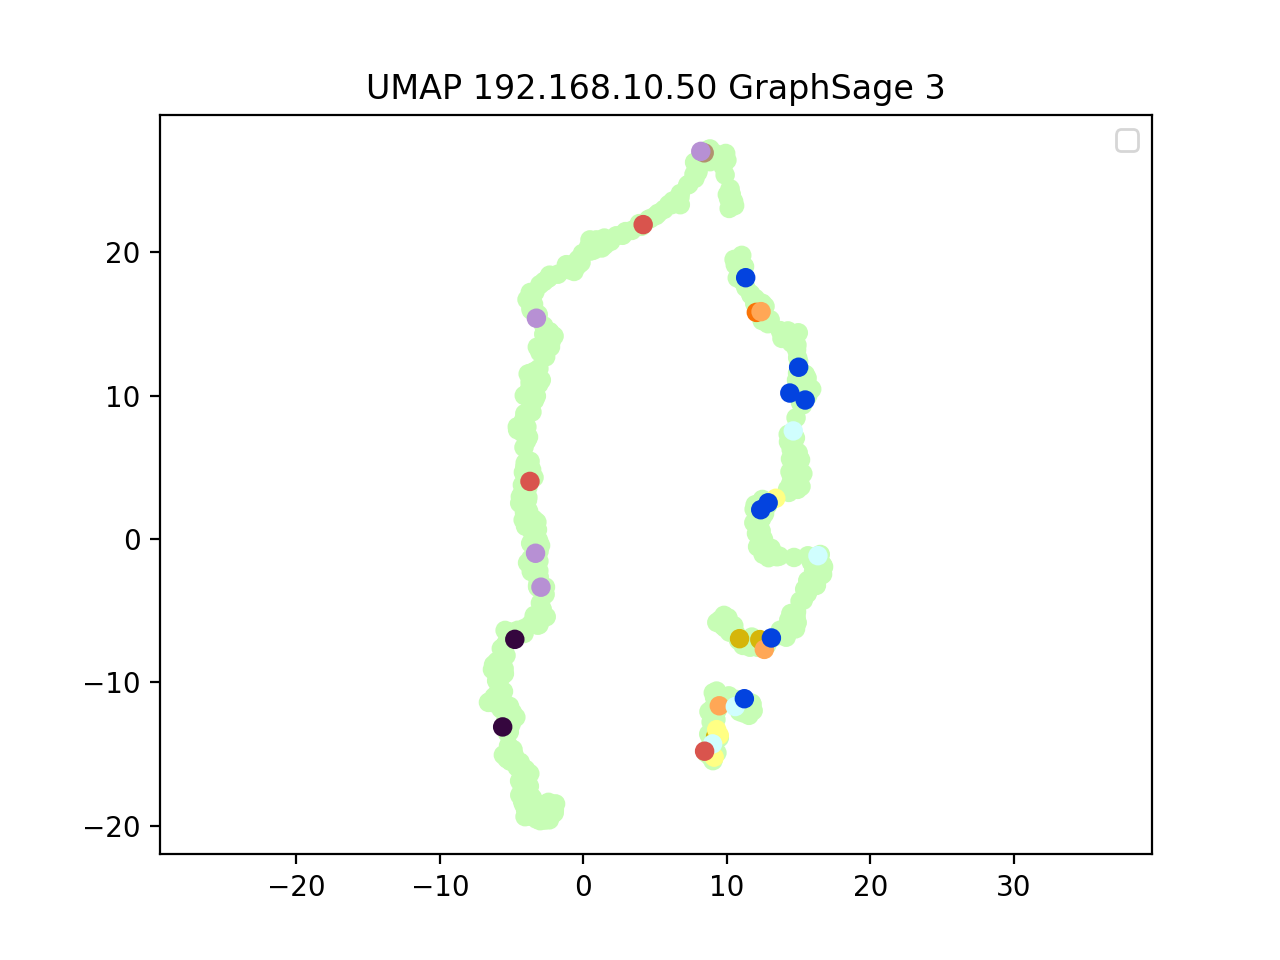

No handles with labels found to put in legend.


In [205]:
plot_umap("GraphSage", 3, "192.168.10.50")


/Users/pierre-luc/repos/eai-graph-tools/venv_pycharm/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


<IPython.core.display.Javascript object>


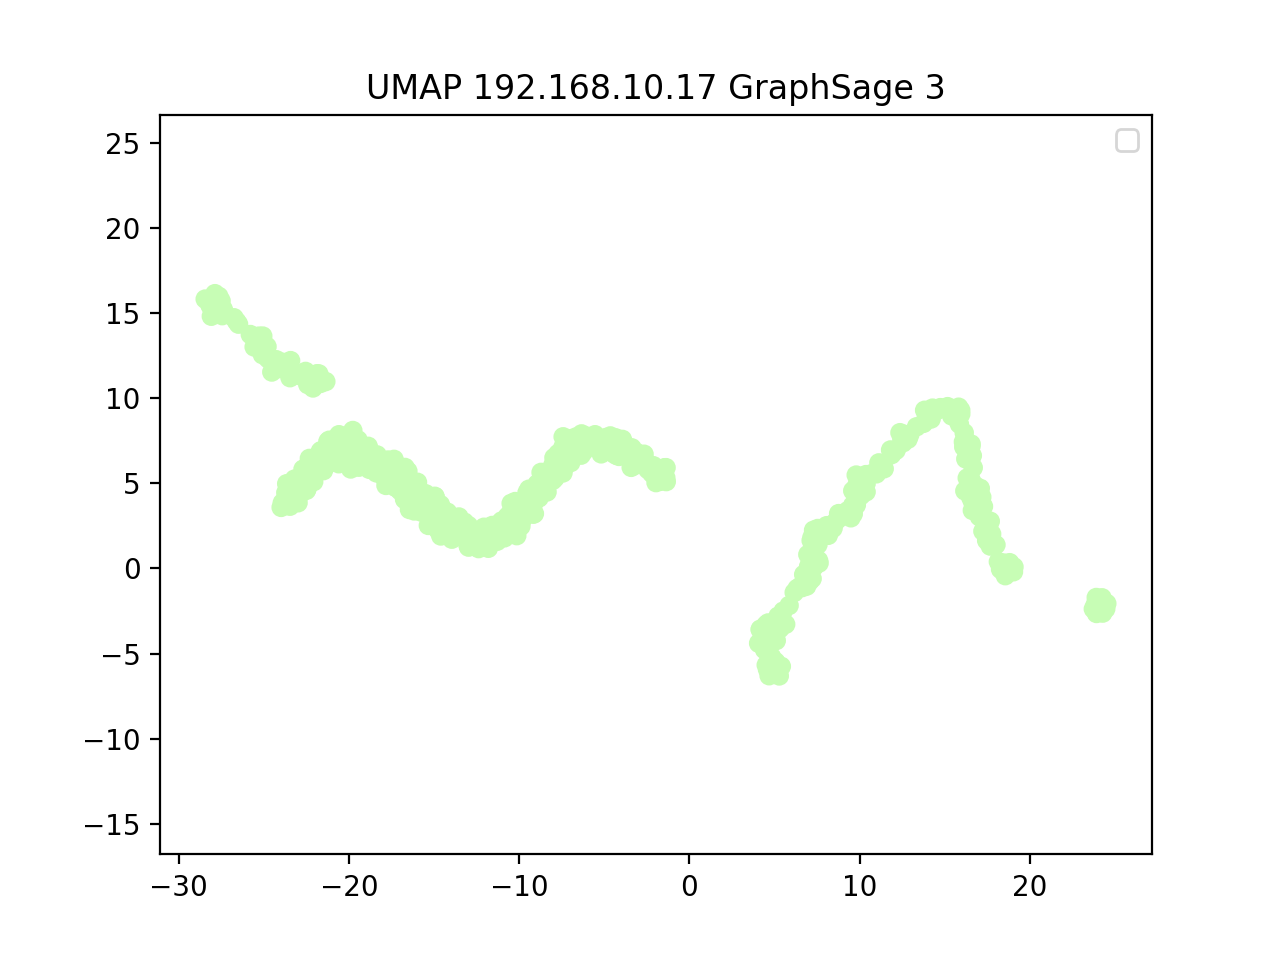

No handles with labels found to put in legend.


In [206]:
plot_umap("GraphSage", 3, "192.168.10.17")


<IPython.core.display.Javascript object>


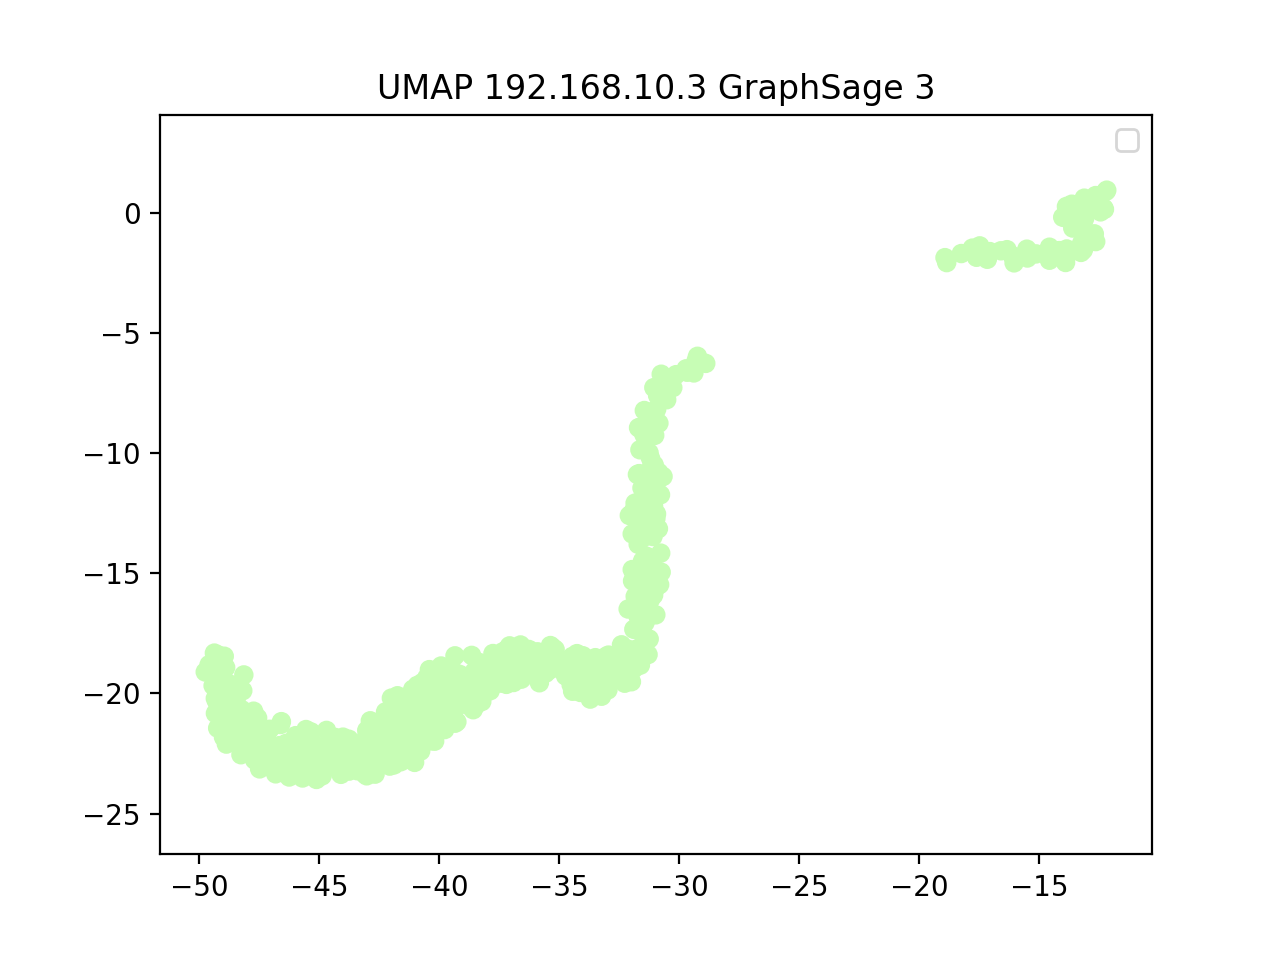

No handles with labels found to put in legend.


In [207]:
plot_umap("GraphSage", 3, "192.168.10.3")

<IPython.core.display.Javascript object>


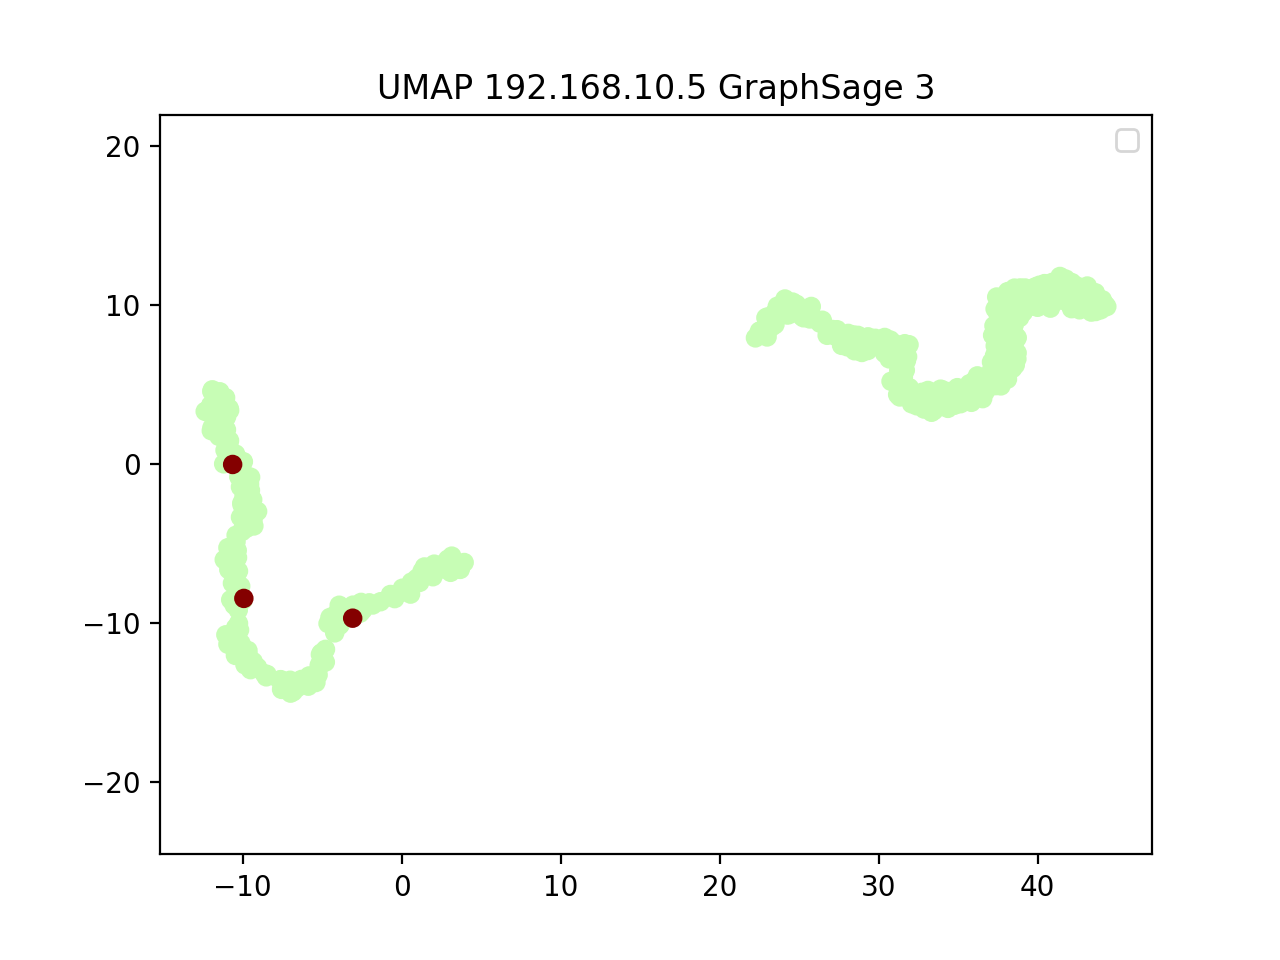

No handles with labels found to put in legend.


In [208]:
plot_umap("GraphSage", 3, "192.168.10.5")

<IPython.core.display.Javascript object>


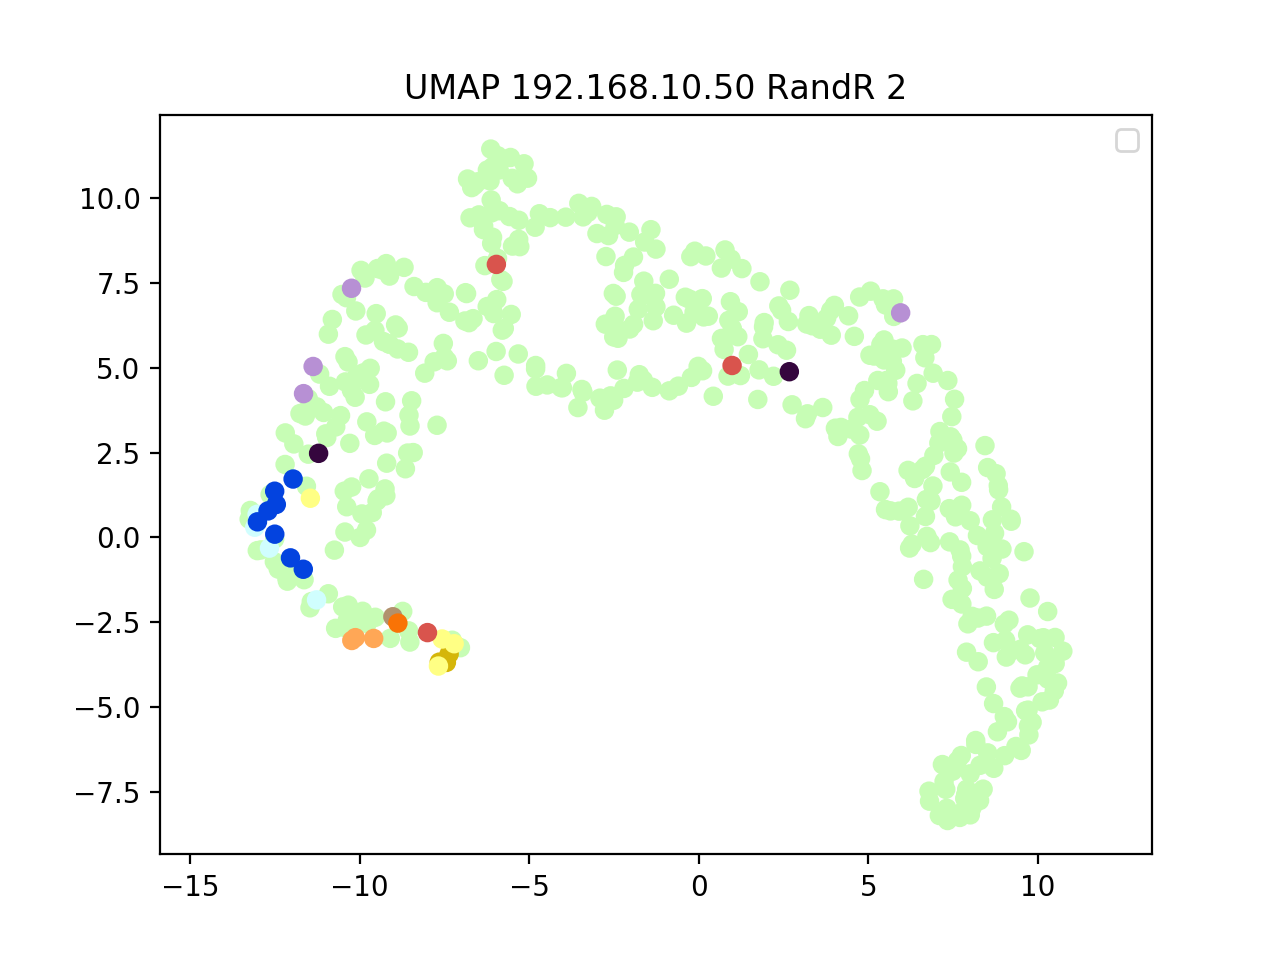

No handles with labels found to put in legend.


In [209]:
plot_umap("RandR", 2, "192.168.10.50")



<IPython.core.display.Javascript object>


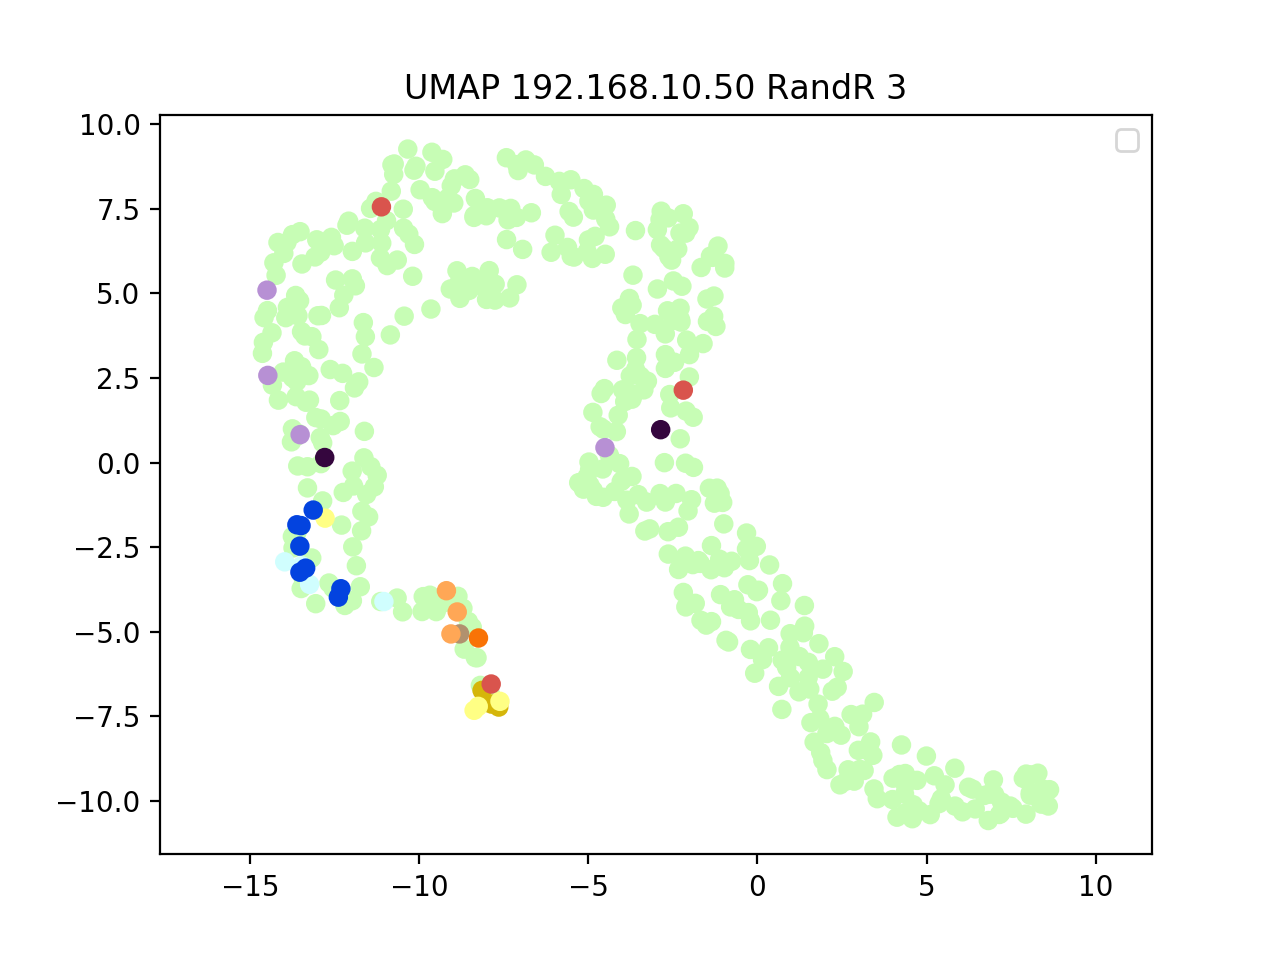

No handles with labels found to put in legend.


In [210]:
plot_umap("RandR", 3, "192.168.10.50")


<IPython.core.display.Javascript object>


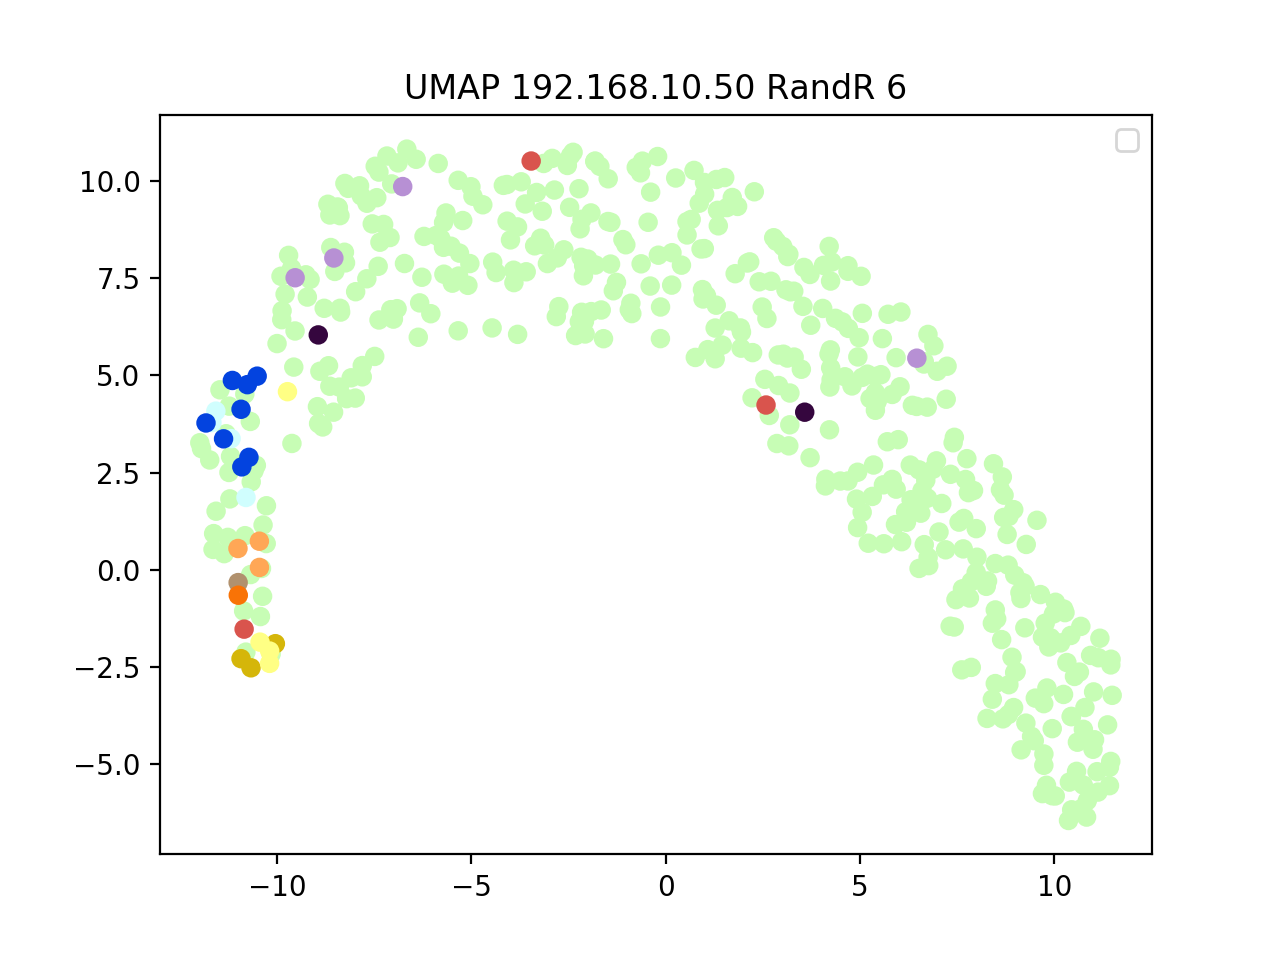

No handles with labels found to put in legend.


In [212]:
plot_umap("RandR", 6, "192.168.10.50")

<IPython.core.display.Javascript object>


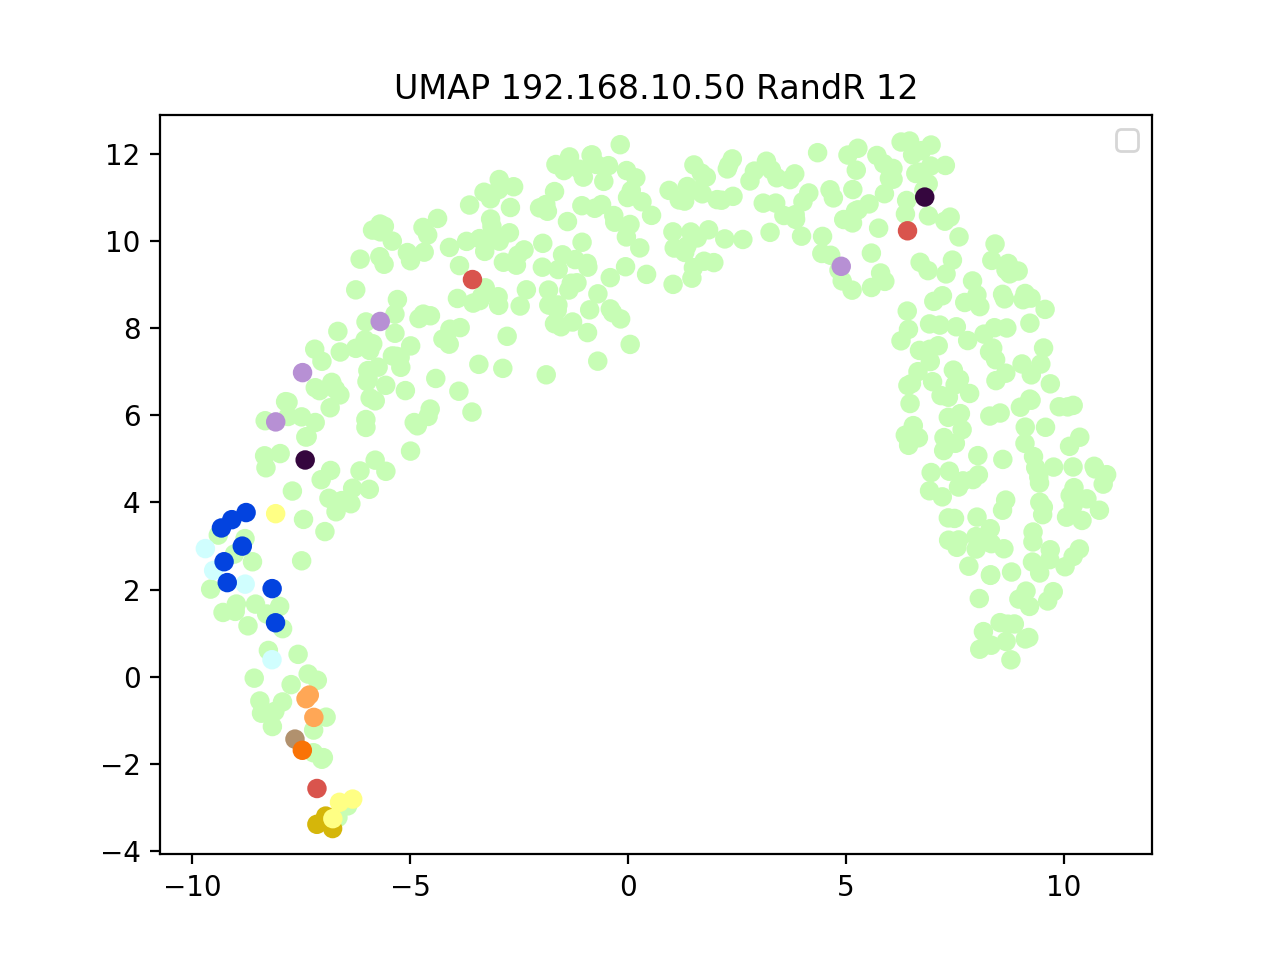

No handles with labels found to put in legend.


In [213]:
plot_umap("RandR", 12, "192.168.10.50")

<IPython.core.display.Javascript object>


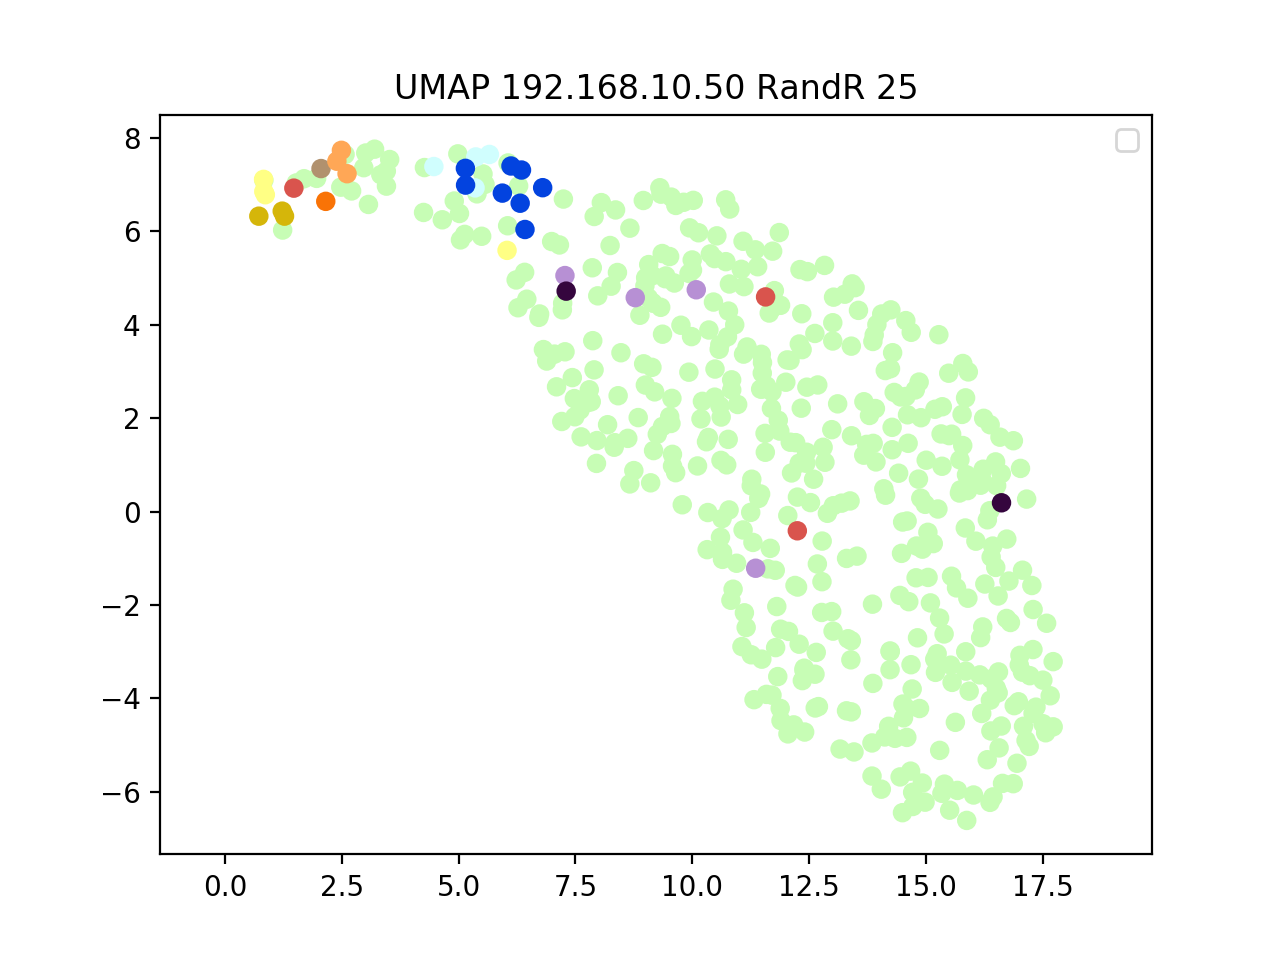

No handles with labels found to put in legend.


In [214]:

plot_umap("RandR", 25, "192.168.10.50")


<IPython.core.display.Javascript object>


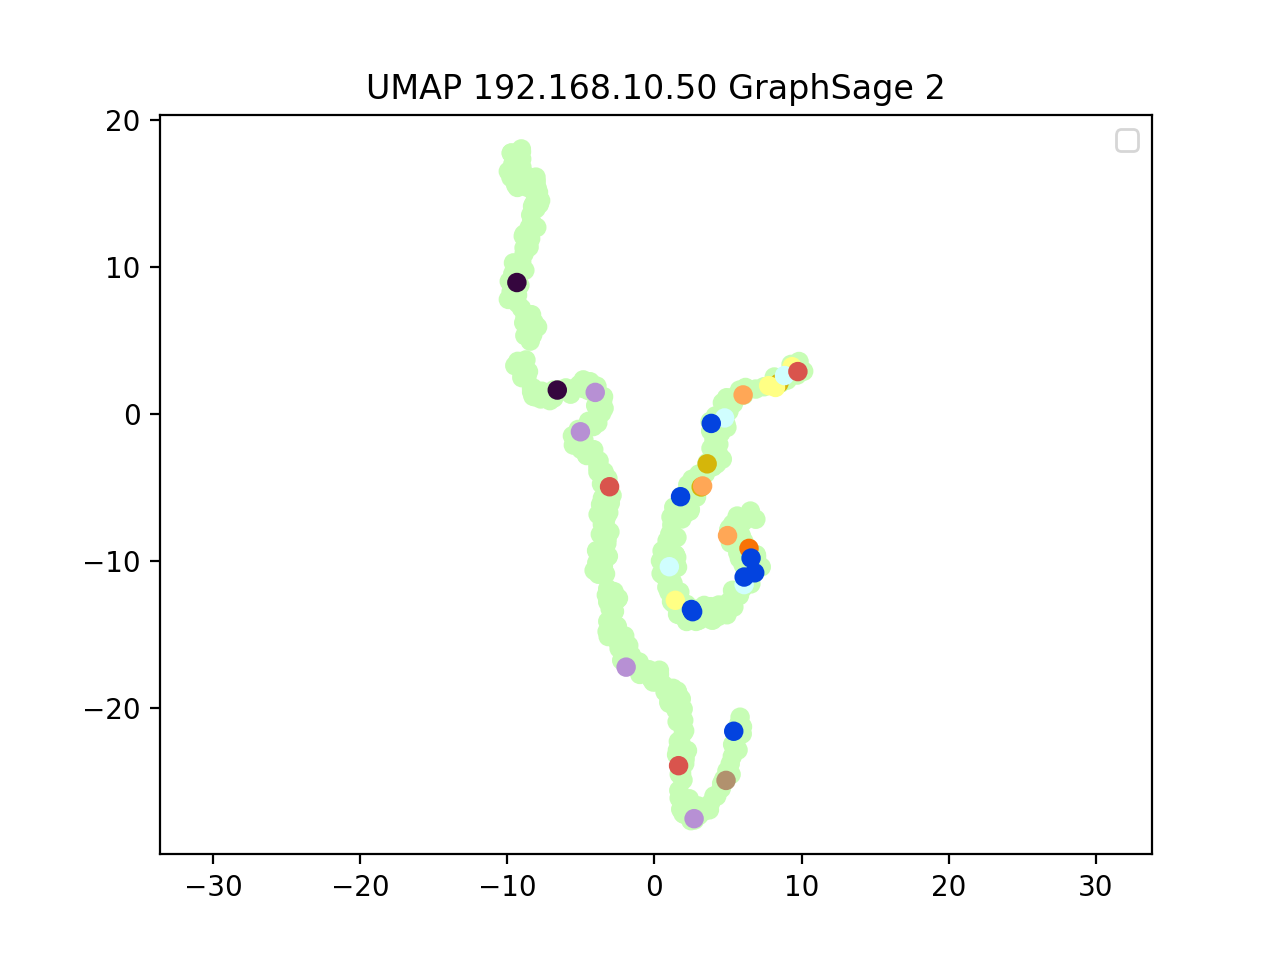

No handles with labels found to put in legend.


In [215]:

plot_umap("GraphSage", 2, "192.168.10.50")

<IPython.core.display.Javascript object>


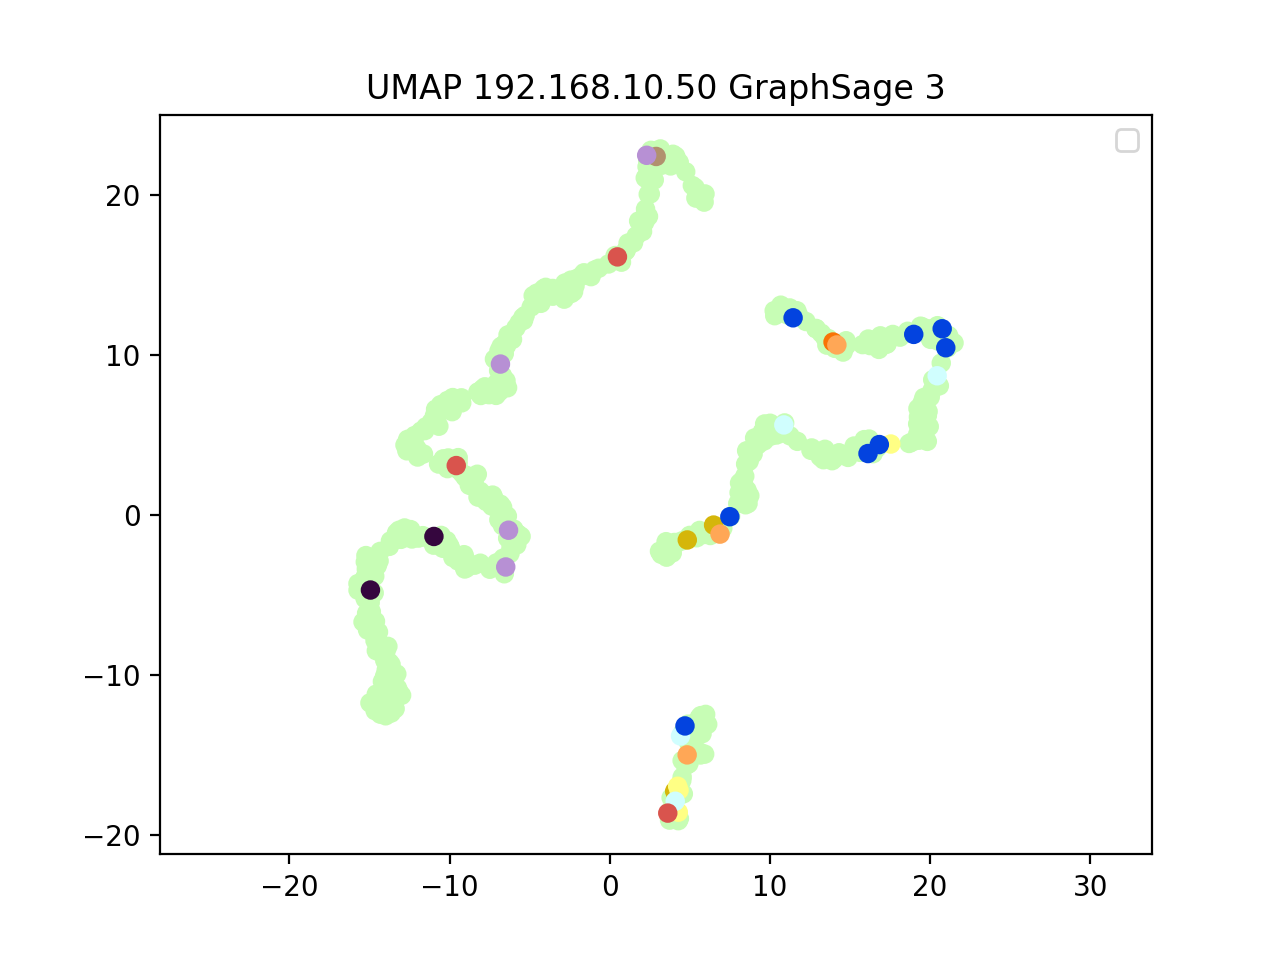

No handles with labels found to put in legend.


In [216]:

plot_umap("GraphSage", 3, "192.168.10.50")

<IPython.core.display.Javascript object>


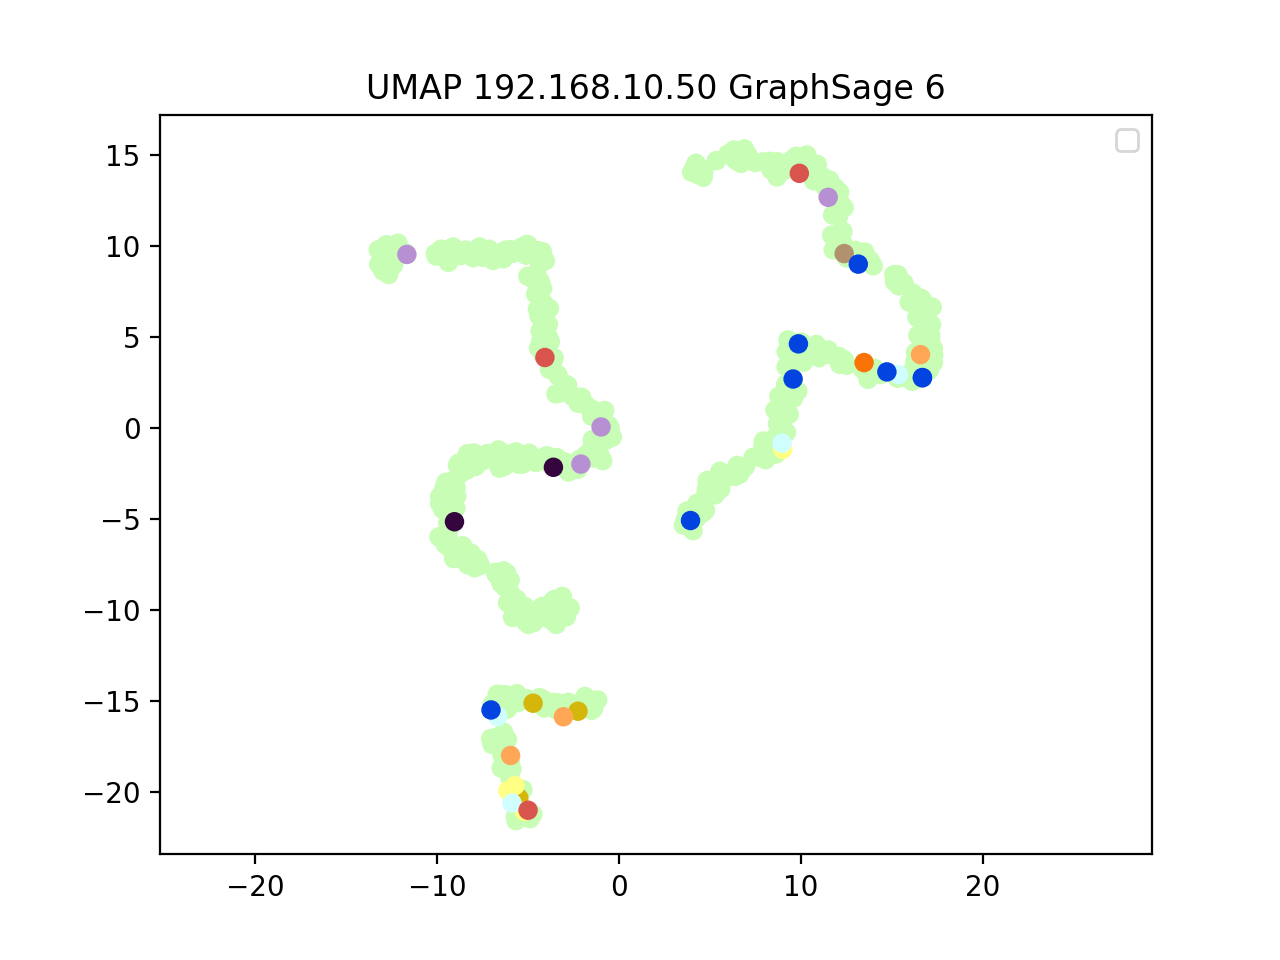

No handles with labels found to put in legend.


In [217]:

plot_umap("GraphSage", 6, "192.168.10.50")

<IPython.core.display.Javascript object>


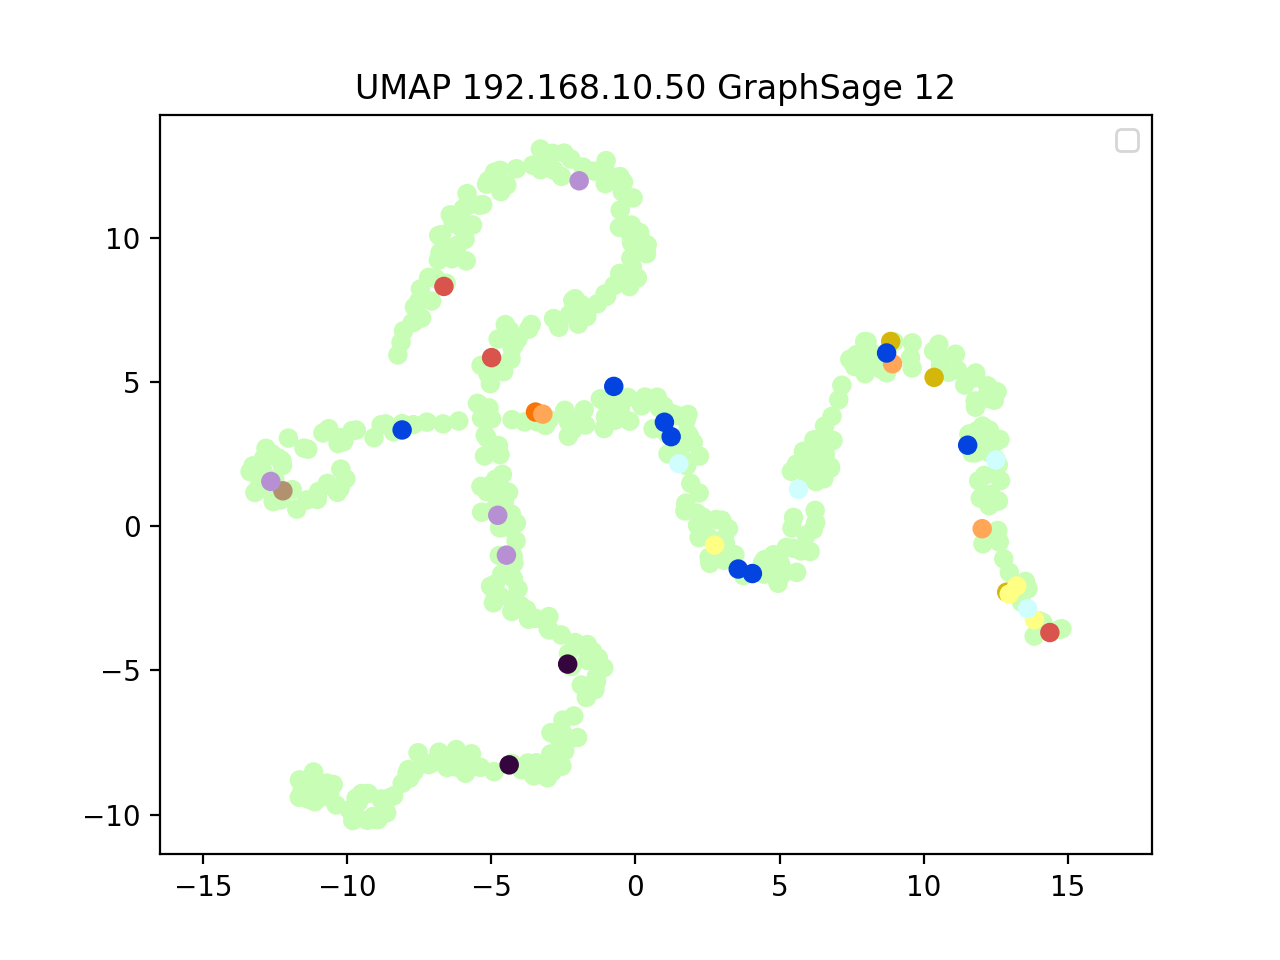

No handles with labels found to put in legend.


In [218]:

plot_umap("GraphSage", 12, "192.168.10.50")

<IPython.core.display.Javascript object>


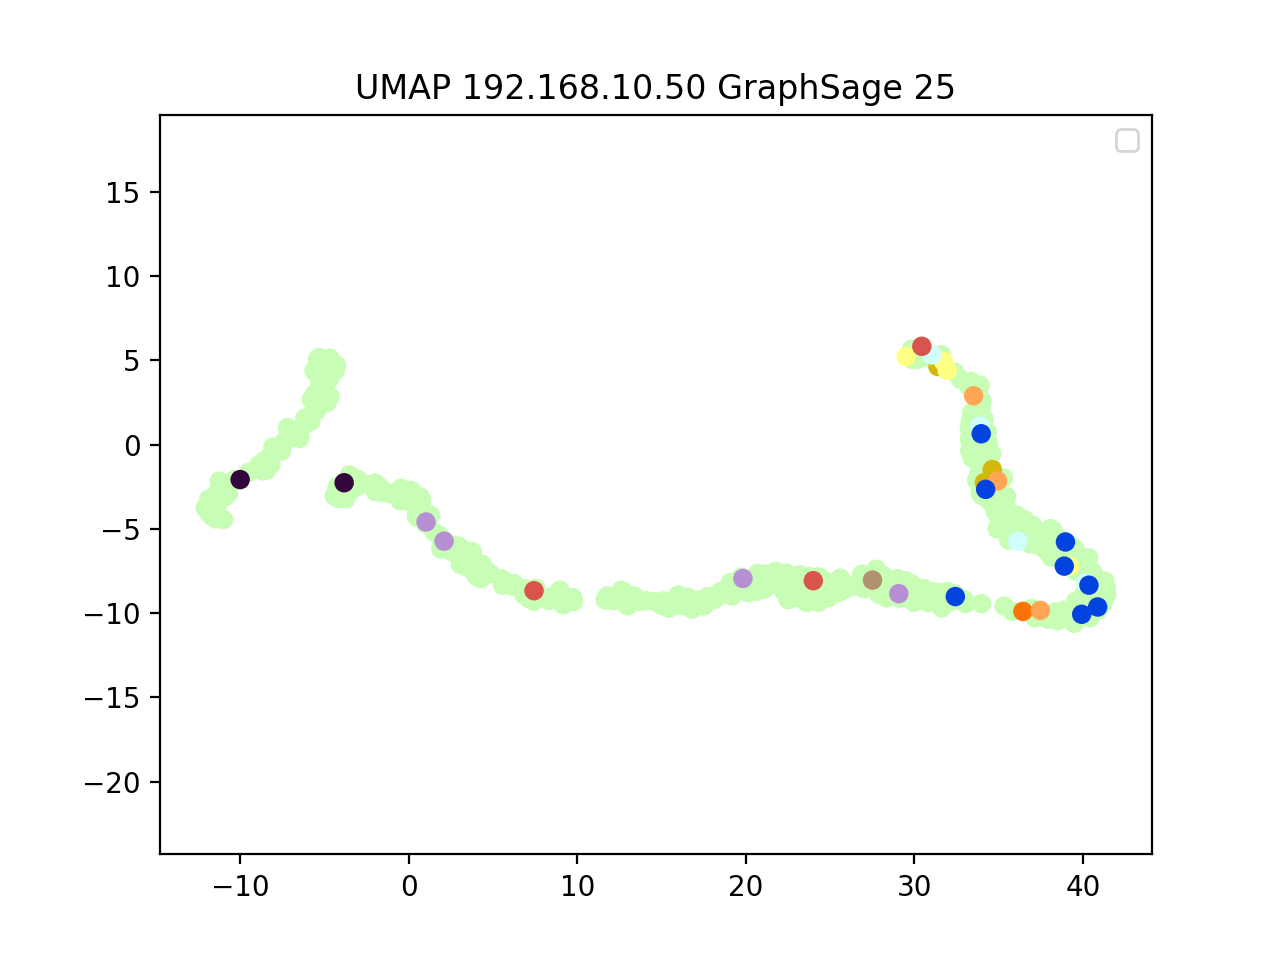

No handles with labels found to put in legend.


In [221]:

plot_umap("GraphSage", 25, "192.168.10.50")